<img src='ict.png' width="500">

## **Traffic Citations Wichita (2015 - 2020)**

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine.data import *
from matplotlib.font_manager import FontProperties
import datetime
import plotnine as p9
import sqldf

# Setting the working directory
import os
path = "J:\Learning Data Science\Projects\ICT Citations"
os.chdir(path)

## Importing and Dataset

In [2]:
cit_2015 = pd.read_csv("cit_2015.csv")
cit_2016 = pd.read_csv("cit_2016.csv")
cit_2017 = pd.read_csv("cit_2017.csv")
cit_2018 = pd.read_csv("cit_2018.csv")
cit_2019 = pd.read_csv("cit_2019.csv")
cit_2020 = pd.read_csv("cit_2020.csv")

# Merging the datasets
cit = pd.concat([cit_2015,cit_2016,cit_2017,cit_2018,cit_2019,cit_2020])

In [3]:
# Loading 5 random records from the dataset
cit.sample(5)

,CITATION_NUMBER,CITATION_DATE_TIME,FILED_DATE,CASE_NUMBER,DEFENDANT_AGE,CITATION_LOCATION,CITATION_ZIP,VEHICLE_MAKE,VEHICLE_COLOR,ACTUAL_SPEED,POSTED_SPEED,CHARGE_DESCRIPTION,CHARGE_DISPOSITION,VEHICLE_TOP_COLOR
40173,19M006743,8/17/2020 19:30,9/24/2020,20TM025542,60.0,2545 W 30TH ST S,67217.0,CHEVROLET,NaN,NaN,NaN,KNOWINGLY DRIVE W/O INSURANCE,NaN,NaN
35930,16M000047,6/26/2017 17:17,2017/06/27 00:00:00+00,17TM018622,24.0,3200 N ROCK RD,67226.0,PONTIAC,BLUE,NaN,NaN,INATTENTIVE DRIVING,GUILTY (IVR),NaN
2795,14M026197,11/15/2015 5:21,2015/11/18 00:00:00+00,15DU000860,22.0,E LINCOLN ST,67218.0,FORD,WHITE,NaN,NaN,DUI - INCAPABLE OF SAFELY OPERATING,GUILTY,NaN
46080,18M014608,9/28/2018 18:00,2018/10/03 00:00:00+00,18TM029962,29.0,E 13TH ST N AT N TOPEKA AVE,67214.0,CHEVROLET,NaN,NaN,NaN,YIELD ROW-STOP SIGN,DISMISSED,WHITE
25454,14M042666,2/24/2016 8:12,2016/02/26 00:00:00+00,16TM008096,49.0,600 N OLIVER AVE,67208.0,GENERAL MOTORS CORP.,"ALUMINUM, SILVER",47.0,35.0,NO DRIVER'S LICENSE,GUILTY,NaN


In [4]:
# Looking at the Data Type for each column
cit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390064 entries, 0 to 52192
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CITATION_NUMBER     390064 non-null  object 
 1   CITATION_DATE_TIME  390064 non-null  object 
 2   FILED_DATE          389821 non-null  object 
 3   CASE_NUMBER         390064 non-null  object 
 4   DEFENDANT_AGE       336094 non-null  float64
 5   CITATION_LOCATION   384039 non-null  object 
 6   CITATION_ZIP        383483 non-null  float64
 7   VEHICLE_MAKE        382019 non-null  object 
 8   VEHICLE_COLOR       321458 non-null  object 
 9   ACTUAL_SPEED        136436 non-null  float64
 10  POSTED_SPEED        136436 non-null  float64
 11  CHARGE_DESCRIPTION  390064 non-null  object 
 12  CHARGE_DISPOSITION  345002 non-null  object 
 13  VEHICLE_TOP_COLOR   58238 non-null   object 
dtypes: float64(4), object(10)
memory usage: 44.6+ MB


## Data Cleaning

### Checking for Missing Values and frequency Distribution

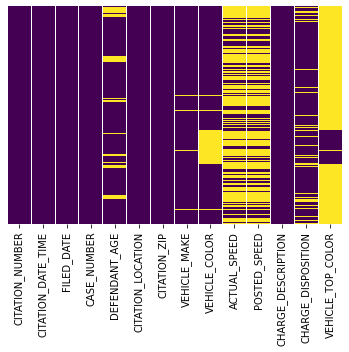

In [5]:
sns.heatmap(cit.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

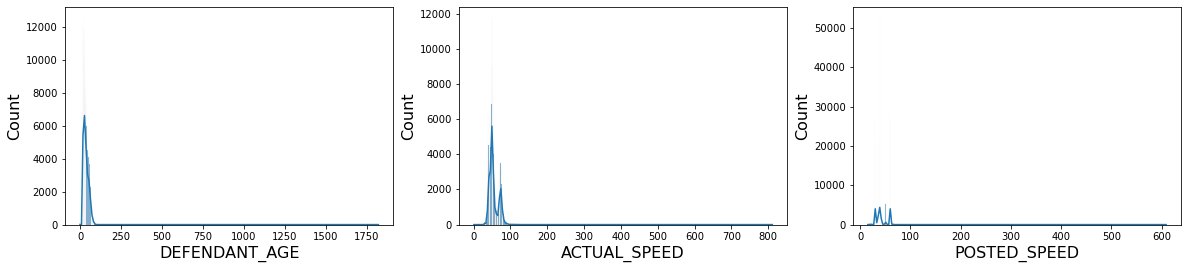

In [6]:
fig = plt.figure(figsize=(20,4))

for i, col in enumerate(cit.iloc[:,[4,9,10]]):
    ax = fig.add_subplot(1, 3, i+1)
    l = ax.get_xlabel()
    ax.set_xlabel(l,fontsize=16)
    k = ax.get_xlabel()
    ax.set_ylabel(k,fontsize=16)
    sns.histplot(cit[col], kde=True)

From the above plots, it is evident that some values are missing, and some are too high to be true. Talking about the missing values, we see some missing values in the 'DEFENDENT_AGE' column. 'VEHICLE_COLOR' has the most amount of missing values. Also, in the 'ACTUAL_SPEED' and 'POSTED_SPEED' columns, there are many missing values. One possible reason could be that the defendant's violation was not related to speed. Therefore, the speed was not reported in the citation issued.

In the 'DEFENDENT_AGE' column, some values are greater than 200, which is impossible. In the 'ACTUAL_SPEED' and 'POSTED_SPEED' columns, there are some values greater than 200 mph. This does not seem correct. They are very likely to be the result of incorrect data entry.  

### Converting Object to Date Time format for 'CITATION_DATE_TIME' Column

In [7]:
cit["CITATION_DATE_TIME"] = pd.to_datetime(cit["CITATION_DATE_TIME"], format ="%m/%d/%Y %H:%M" )

## Feature Creation

### Extracting Year, Month, Day, and Hour

In [8]:
cit["Year"] = cit["CITATION_DATE_TIME"].dt.year
cit["Month"] = cit["CITATION_DATE_TIME"].dt.strftime("%B")
cit["day"] = cit["CITATION_DATE_TIME"].dt.strftime("%A")
cit["hour"] = cit["CITATION_DATE_TIME"].dt.hour

### Creating Age Group Column

In [9]:
conditions = [
    (cit['DEFENDANT_AGE'] < 15),
    (cit['DEFENDANT_AGE'] >= 15) & (cit['DEFENDANT_AGE'] < 20),
    (cit['DEFENDANT_AGE'] >= 20) & (cit['DEFENDANT_AGE'] < 25),
    (cit['DEFENDANT_AGE'] >= 25) & (cit['DEFENDANT_AGE'] < 30),
    (cit['DEFENDANT_AGE'] >= 30) & (cit['DEFENDANT_AGE'] < 35),
    (cit['DEFENDANT_AGE'] >= 35) & (cit['DEFENDANT_AGE'] < 40),
    (cit['DEFENDANT_AGE'] >= 40) & (cit['DEFENDANT_AGE'] < 45),
    (cit['DEFENDANT_AGE'] >= 45) & (cit['DEFENDANT_AGE'] < 50),
    (cit['DEFENDANT_AGE'] >= 50) & (cit['DEFENDANT_AGE'] < 55),
    (cit['DEFENDANT_AGE'] >= 55) & (cit['DEFENDANT_AGE'] < 60),
    (cit['DEFENDANT_AGE'] >= 60) & (cit['DEFENDANT_AGE'] < 65),
    (cit['DEFENDANT_AGE'] >= 65) & (cit['DEFENDANT_AGE'] < 70),
    (cit['DEFENDANT_AGE'] >= 70) 
    ]
values = ['Less than 15', '15-19', '20-24', '25-29', '30-34','35-39', '40-44','45-49', '50-54','55-59', '60-64','65-69', '70 & older']
cit['Age_group'] = np.select(conditions, values)

In [10]:
pd.DataFrame(cit[cit['DEFENDANT_AGE'].notnull() & cit['DEFENDANT_AGE']
].groupby(["Age_group"],dropna=True)["CITATION_NUMBER"].nunique(dropna=True)).sort_values("CITATION_NUMBER", ascending=False)

,CITATION_NUMBER
Age_group,
20-24,43793
25-29,35069
30-34,29748
15-19,27136
35-39,25105
40-44,20111
45-49,17260
50-54,16208
55-59,14944


## Data Exploration

### Checking the count of Duplicate Citation Number

In [11]:
cit_duplicate = pd.DataFrame(cit["CITATION_NUMBER"].duplicated())
cit_duplicate.head(10)

,CITATION_NUMBER
0,False
1,True
2,True
3,True
4,True
5,False
6,True
7,True
8,True
9,False


Duplicate Citation number means that the driver was charged for multiple traffic violations at the same time. For example a particular driver may have received a ticket for not wearing seatbelt, inattentive driving and the actual speed limit higher than the posted speed limit.

### Variation of Citations issued each year in Wichita

In [12]:
cit_count = cit.groupby("Year")["CITATION_NUMBER"].nunique(dropna=False) #Counting the unique Citation Number
cit_count = pd.DataFrame(cit_count)
cit_count

,CITATION_NUMBER
Year,
2015,70654
2016,61114
2017,47490
2018,46348
2019,41852
2020,42122


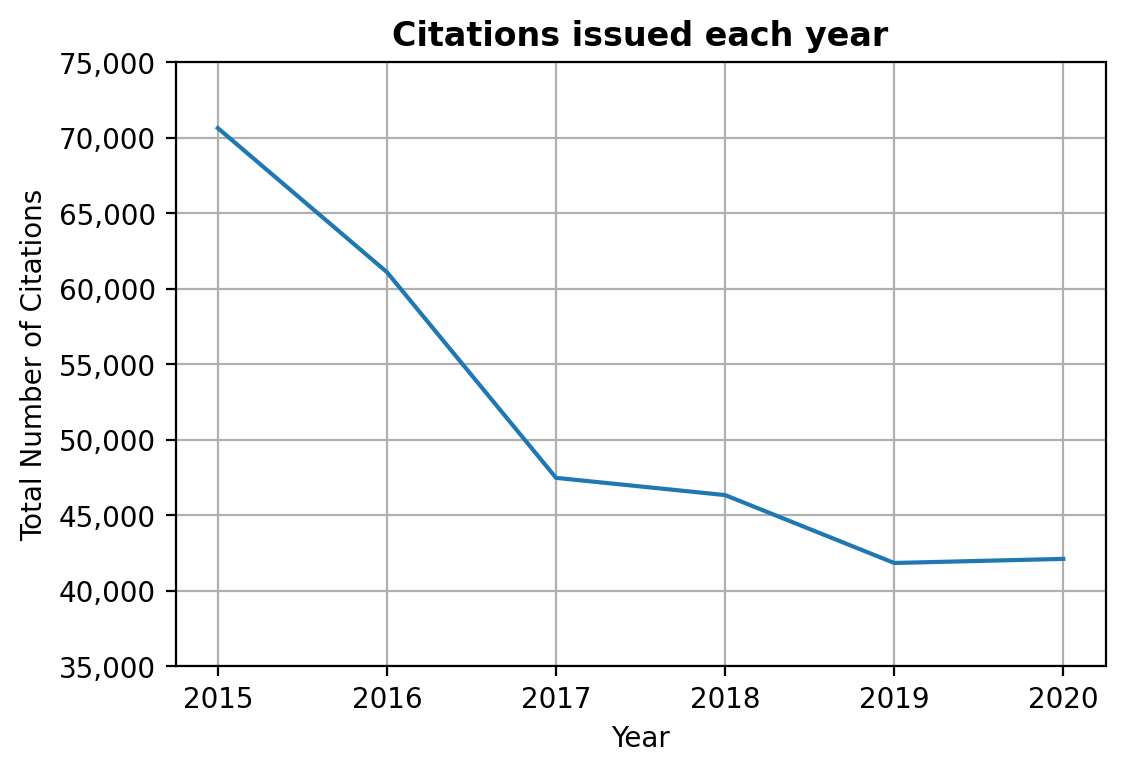

In [13]:
import matplotlib as mpl
fig, ax = plt.subplots(dpi=200)
plt.plot(cit_count.index, cit_count.CITATION_NUMBER)
plt.xticks(np.arange(2015,2021,step=1))
plt.yticks(np.arange(35000,80000,step=5000))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) # Thousand Separators
plt.xlabel("Year")
plt.ylabel("Total Number of Citations")
plt.title("Citations issued each year",fontweight="bold")
plt.grid()
plt.savefig("Citations issued each year.png",dpi=300, bbox_inches = "tight")
plt.show()

### Car Brand with most citations

In [33]:
vehicle_make_df = pd.DataFrame(pd.DataFrame(cit.groupby(["VEHICLE_MAKE"],dropna=True)["CITATION_NUMBER"].nunique()).sort_values("CITATION_NUMBER", ascending=False)).head(14)
as_list = vehicle_make_df.index.tolist()
idx = as_list.index('JEEP (1989 TO PRESENT)')
as_list[idx] = 'JEEP'
vehicle_make_df.index = as_list
vehicle_make_df

,CITATION_NUMBER
CHEVROLET,51994
FORD,50232
TOYOTA,23159
HONDA,21626
DODGE,21334
NISSAN,15436
HYUNDAI,10798
GENERAL MOTORS CORP.,10591
CHRYSLER,8697
PONTIAC,8517


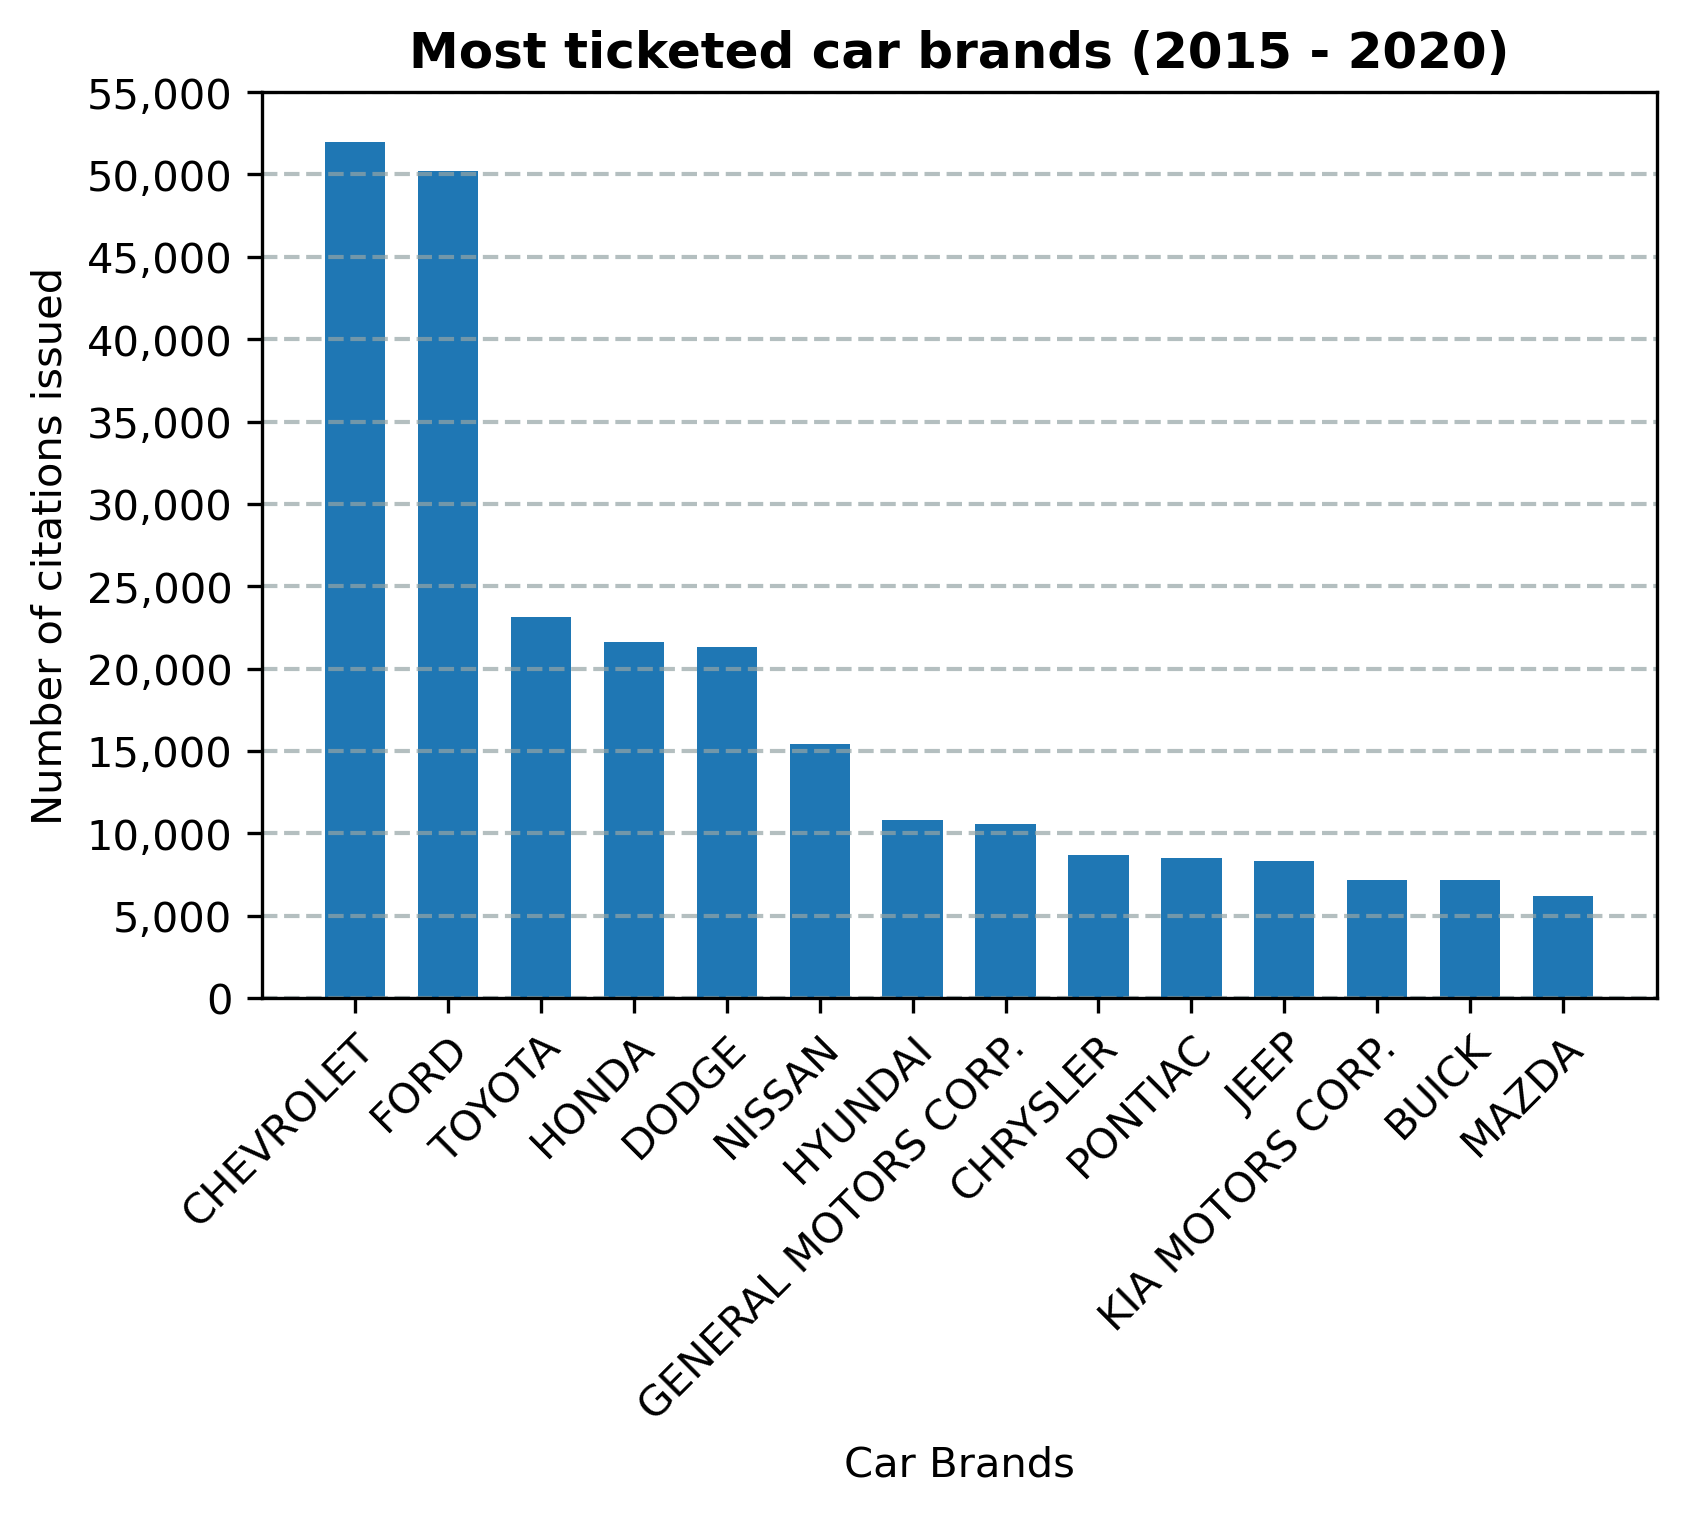

In [15]:
fig, ax = plt.subplots(dpi=300)
plt.bar(vehicle_make_df.index.to_list(),vehicle_make_df.CITATION_NUMBER.to_list(),width=0.65)
plt.xticks(rotation=45, ha="right",
         rotation_mode="anchor")
plt.yticks(np.arange(0,57500,step=5000))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.title("Most ticketed car brands (2015 - 2020)",fontweight="bold")
plt.ylabel("Number of citations issued")
plt.xlabel("Car Brands")
plt.show()

### Citations issued for different age group

In [39]:
pd.DataFrame(pd.DataFrame(cit.groupby(["CHARGE_DESCRIPTION"],dropna=True)["CITATION_NUMBER"].nunique()).sort_values("CITATION_NUMBER", ascending=False)).head(7)

,CITATION_NUMBER
CHARGE_DESCRIPTION,
SPEED OVER LIMIT,93768
NO PROOF OF INSURANCE,27645
DR ON SUSP/REV/CANC/FRAUD DL,18709
SEAT BELT REQUIRED 18 OR OLDER,16155
METER VIOL. ON LOT,15983
NO DRIVER'S LICENSE,15298
INATTENTIVE DRIVING,14545


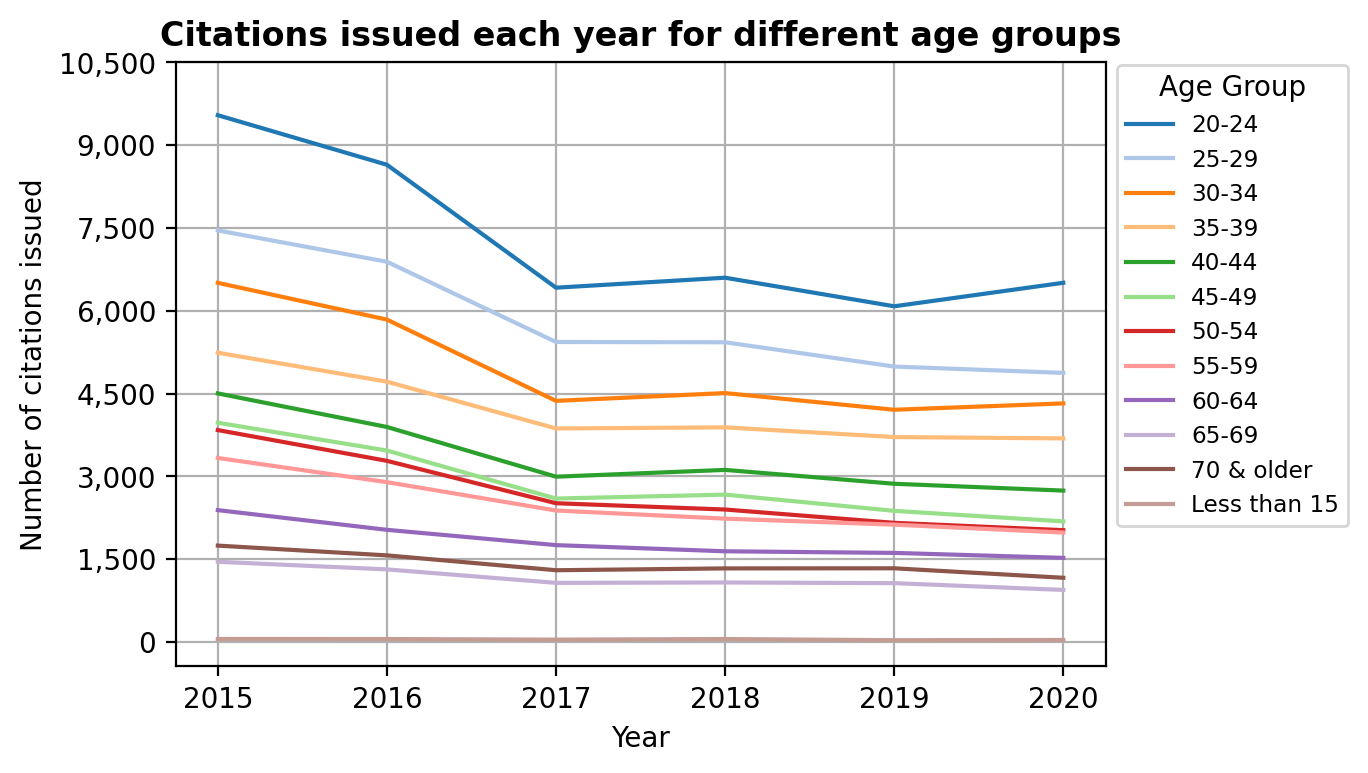

In [25]:
# Creating a pivot table with year as the row and age group as the column
cit_age = pd.DataFrame(pd.DataFrame(cit[cit.DEFENDANT_AGE<105].groupby(["Year","Age_group"],dropna=True)["CITATION_NUMBER"].nunique()).sort_values("CITATION_NUMBER", ascending=False))
df_cit_age=cit_age.pivot_table(index=["Year"], columns="Age_group",values= "CITATION_NUMBER")

# Making a line plot
year = np.arange(2015, 2021, step=1)
fig, ax = plt.subplots(dpi=200)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
for count in df_cit_age.iloc[:,1:].columns.to_list():
    plt.plot(df_cit_age.iloc[:,1:].index, df_cit_age.iloc[:,1:][count], label = count)
plt.xticks(np.arange(2015, 2021, step=1))
plt.yticks(np.arange(0, 12000, step=1500))
plt.xticks(np.arange(2015, 2021, step=1))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Citations issued each year for different age groups",fontweight="bold")
plt.ylabel("Number of citations issued")
plt.xlabel("Year")
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1.015), loc='upper left',prop=fontP)
plt.grid()
plt.show()

In [40]:
df_cit_age

Age_group,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70 & older,Less than 15
Year,,,,,,,,,,,,,
2015,5776,9544,7456,6506,5240,4502,3971,3838,3332,2387,1451,1744,52
2016,5343,8646,6888,5840,4715,3894,3467,3280,2894,2030,1313,1567,51
2017,3991,6418,5434,4367,3867,2993,2597,2512,2380,1753,1069,1298,40
2018,4199,6599,5429,4508,3887,3116,2668,2398,2233,1641,1076,1331,51
2019,3829,6081,4989,4206,3711,2865,2374,2157,2124,1612,1064,1333,30
2020,3998,6507,4874,4321,3687,2741,2183,2024,1981,1522,941,1161,34


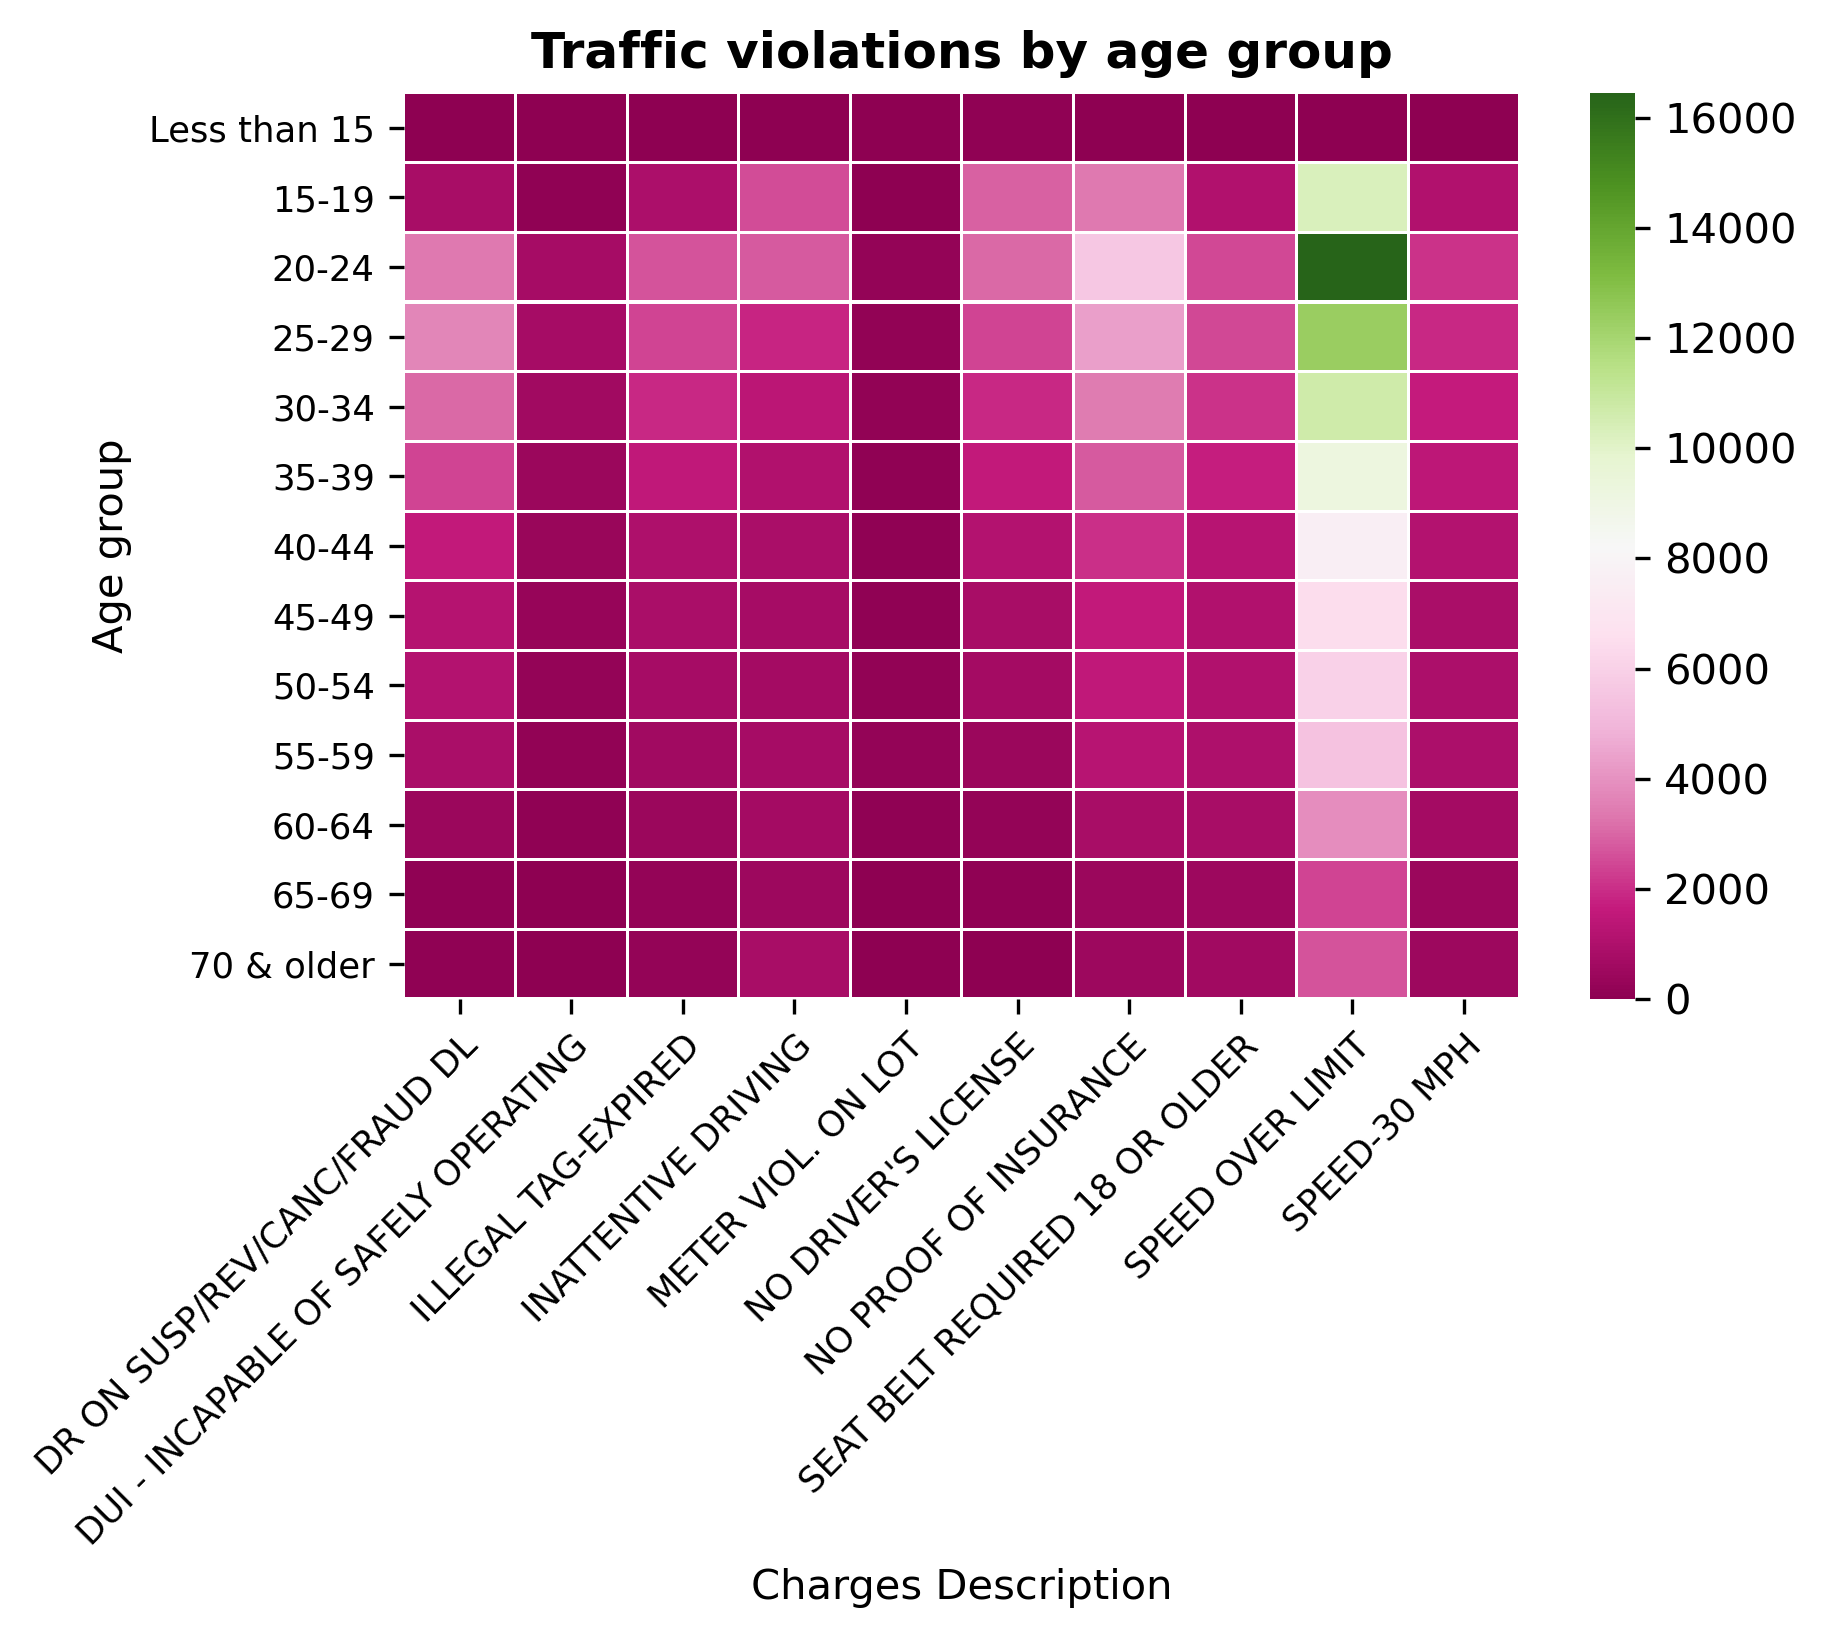

In [17]:
cit_charges = cit[(cit.CHARGE_DESCRIPTION=="SPEED OVER LIMIT")|(cit.CHARGE_DESCRIPTION=="SEAT BELT REQUIRED 18 OR OLDER")|
                  (cit.CHARGE_DESCRIPTION=="DR ON SUSP/REV/CANC/FRAUD DL")|(cit.CHARGE_DESCRIPTION=="NO PROOF OF INSURANCE")|
                  (cit.CHARGE_DESCRIPTION=="METER VIOL. ON LOT")|(cit.CHARGE_DESCRIPTION=="NO DRIVER'S LICENSE")|
                  (cit.CHARGE_DESCRIPTION=="INATTENTIVE DRIVING")|(cit.CHARGE_DESCRIPTION=="ILLEGAL TAG-EXPIRED")|
                  (cit.CHARGE_DESCRIPTION=="SPEED-30 MPH")|(cit.CHARGE_DESCRIPTION=="DUI - INCAPABLE OF SAFELY OPERATING")]
cit_charges_tbl =pd.DataFrame(pd.DataFrame(cit_charges[(cit_charges.DEFENDANT_AGE>0)&(cit_charges.DEFENDANT_AGE<120)].groupby(["CHARGE_DESCRIPTION","Age_group"],dropna=True)["CITATION_NUMBER"].nunique()).sort_values("CITATION_NUMBER", ascending=False)).reset_index()
cit_charges_tbl_pivot = cit_charges_tbl.pivot_table(index=["Age_group"],columns="CHARGE_DESCRIPTION",values='CITATION_NUMBER')
a = ['Less than 15', '15-19', '20-24', '25-29', '30-34','35-39', '40-44','45-49', '50-54','55-59', '60-64','65-69', '70 & older']
cit_charges_tbl_pivot = cit_charges_tbl_pivot.reindex(index=a)
cit_charges_tbl_pivot=cit_charges_tbl_pivot.fillna(0)

from matplotlib import pyplot
pyplot.figure(dpi=300)
ax = sns.heatmap(cit_charges_tbl_pivot,linewidths=.5,cmap="PiYG")
plt.xticks(rotation=45, ha="right",
         rotation_mode="anchor", size=8.5)
plt.xlabel("Charges Description")
plt.ylabel("Age group")
plt.yticks(size=8.5)
plt.title("Traffic violations by age group",fontweight="bold")
plt.show()

### Variation of Citations issued over the years 

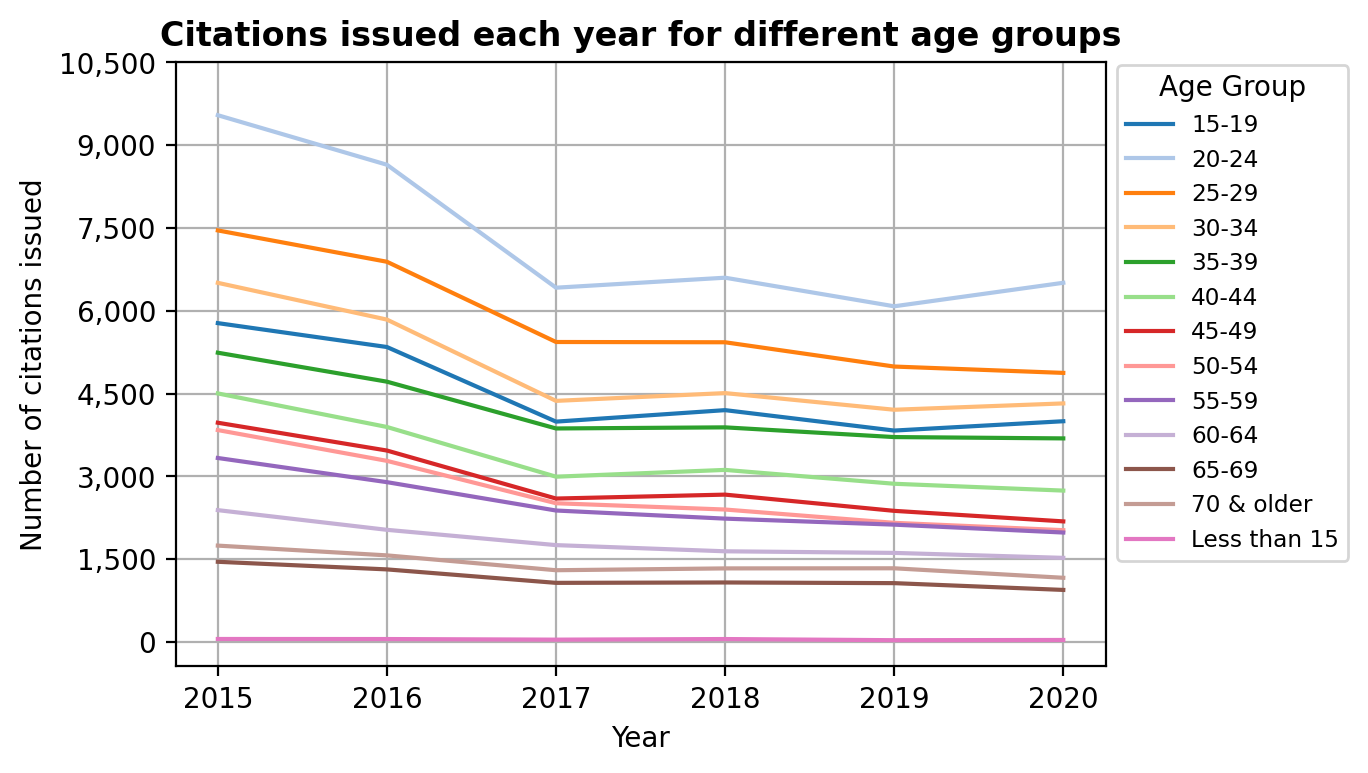

In [68]:
# Making a line plot
year = np.arange(2015, 2021, step=1)
fig, ax = plt.subplots(dpi=200)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
for count in df_cit_age.iloc[:,0:].columns.to_list():
    plt.plot(df_cit_age.iloc[:,0:].index, df_cit_age.iloc[:,0:][count], label = count)
plt.xticks(np.arange(2015, 2021, step=1))
plt.yticks(np.arange(0, 12000, step=1500))
plt.xticks(np.arange(2015, 2021, step=1))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Citations issued each year for different age groups",fontweight="bold")
plt.ylabel("Number of citations issued")
plt.xlabel("Year")
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1.015), loc='upper left',prop=fontP)
plt.grid()
plt.show()

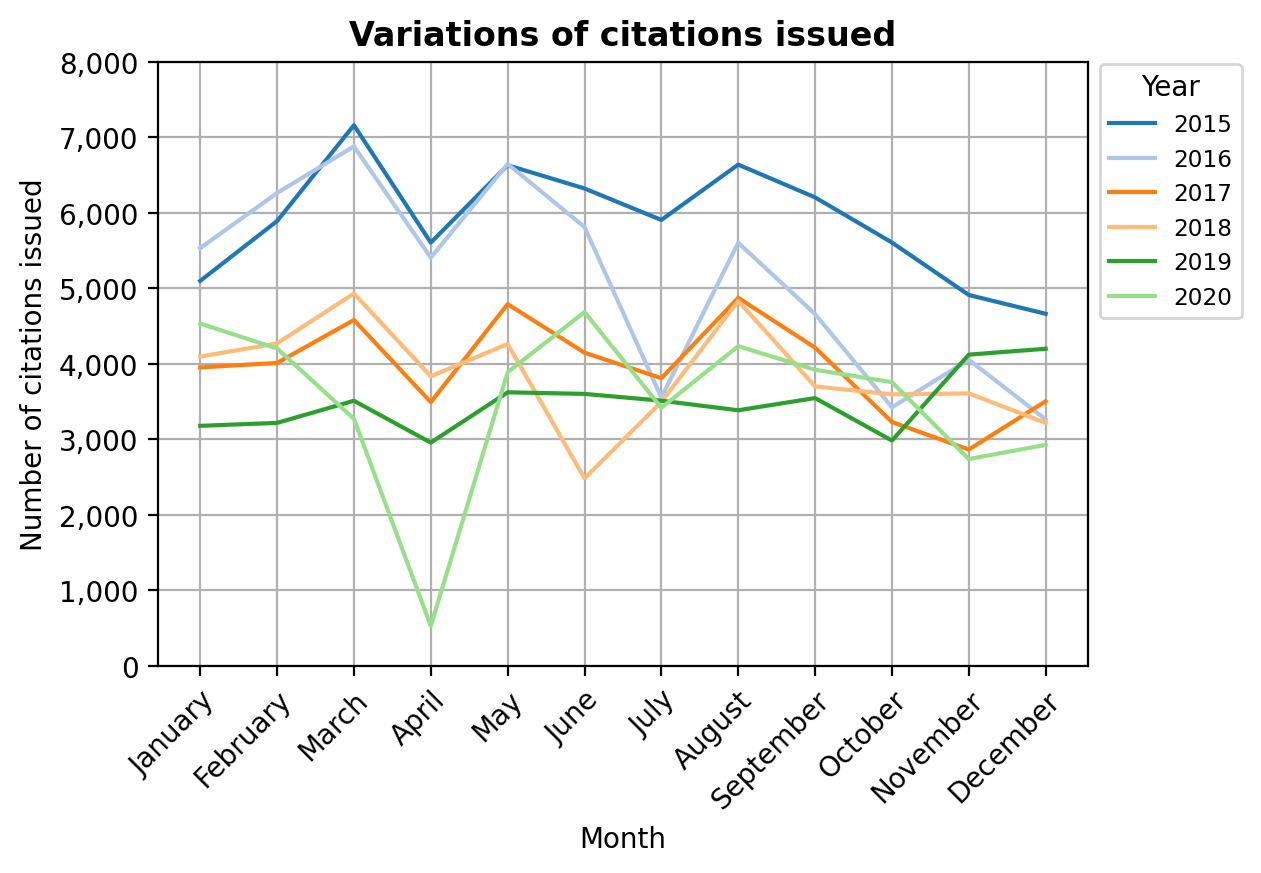

In [73]:
cit_year_month =pd.DataFrame(pd.DataFrame(cit.groupby(["Year","Month"],dropna=True)["CITATION_NUMBER"].nunique()).sort_values("CITATION_NUMBER", ascending=False)).reset_index()
cit_year_month_pivot = cit_year_month.pivot_table(index=["Year"],columns="Month",values='CITATION_NUMBER')
cit_year_month_pivot = cit_year_month_pivot[['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December']]

Year_hmp = cit_year_month_pivot.index.to_list()
Months_hmp = cit_year_month_pivot.columns.to_list()
values_hmp=cit_year_month_pivot.values

cit_year_month_pivot = cit_year_month_pivot.T

# Making a line plot
year = np.arange(2015, 2021, step=1)
fig, ax = plt.subplots(dpi=200)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
for count in cit_year_month_pivot.iloc[:,0:].columns.to_list():
    plt.plot(cit_year_month_pivot.iloc[:,0:].index, cit_year_month_pivot.iloc[:,0:][count], label = count)
plt.yticks(np.arange(0, 8500, step=1000),size=10)
plt.xticks(rotation=45, ha="right",
         rotation_mode="anchor", size=10)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Variations of citations issued",fontweight="bold")
plt.ylabel("Number of citations issued")
plt.xlabel("Month")
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title='Year', bbox_to_anchor=(1, 1.015), loc='upper left',prop=fontP)
plt.grid()
plt.show()


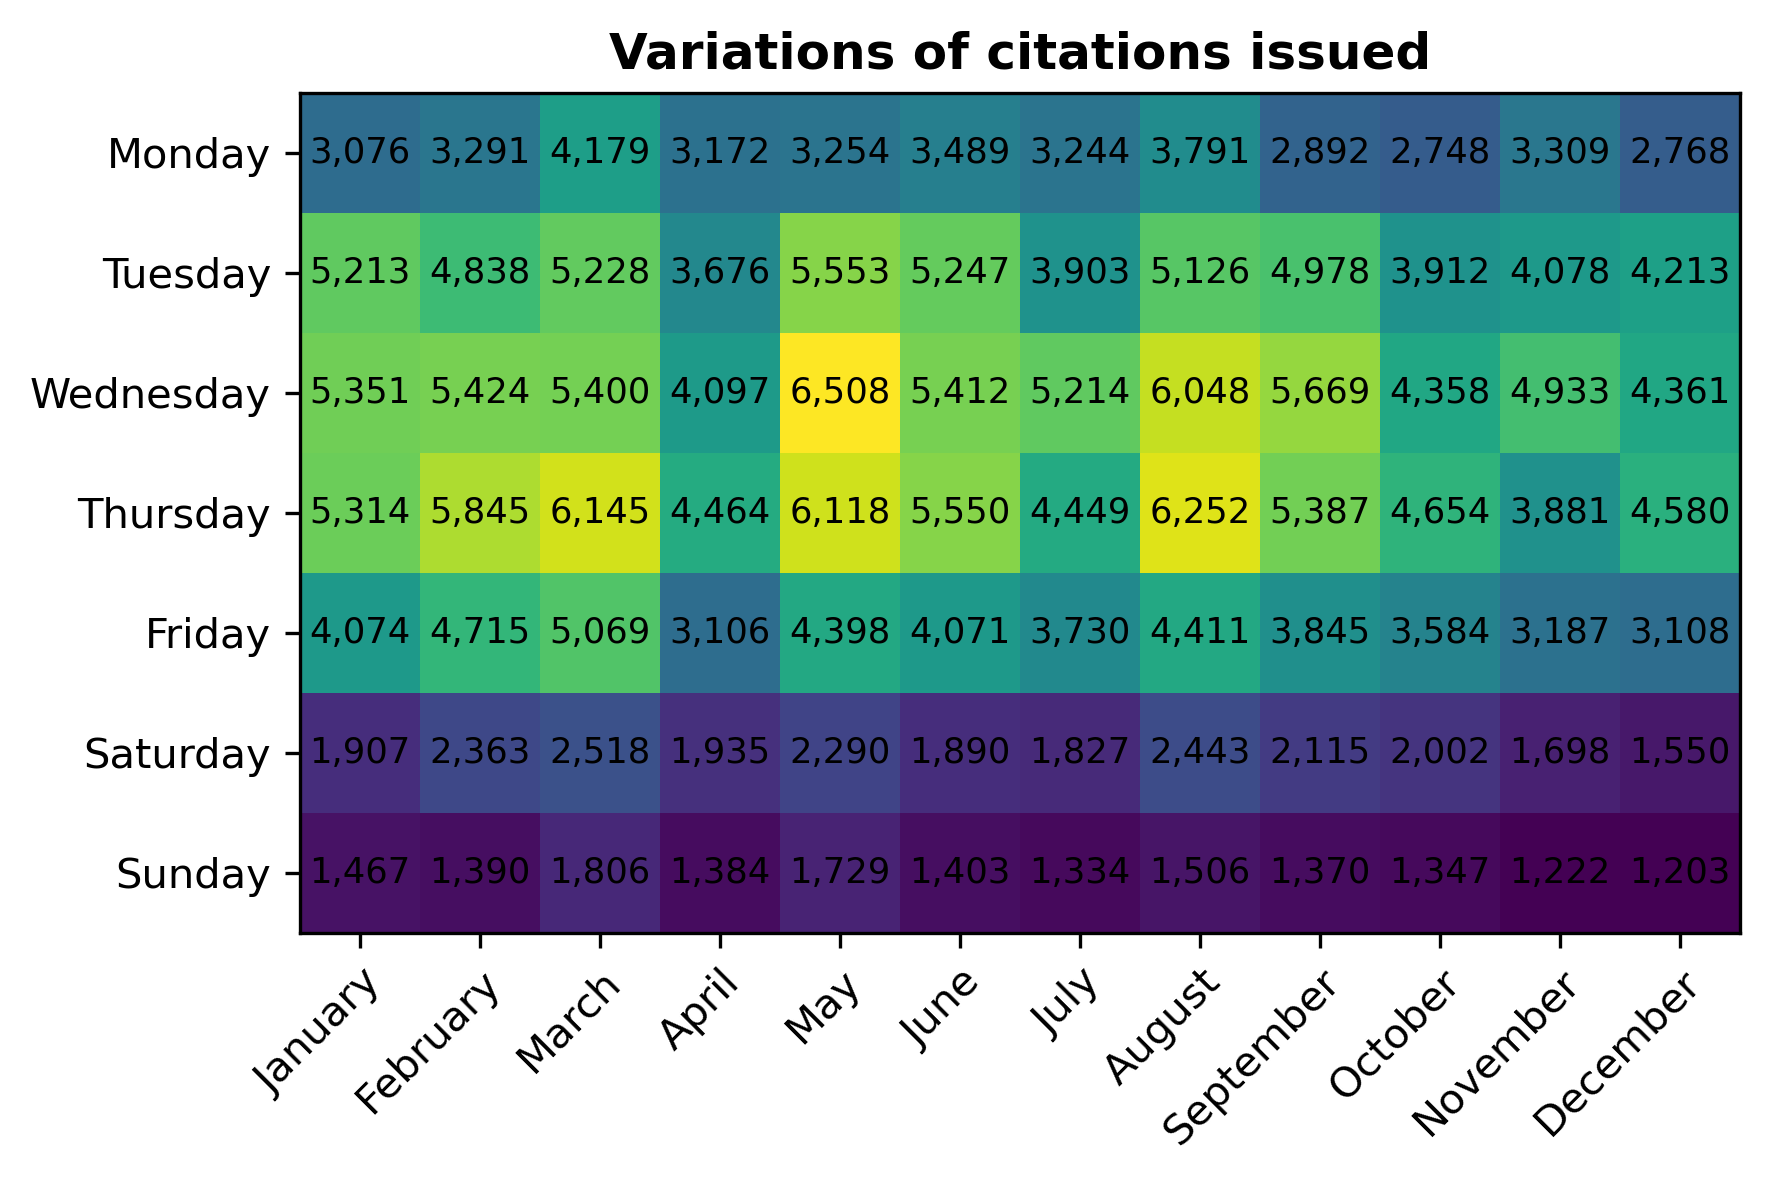

In [19]:
cit_day_month =pd.DataFrame(pd.DataFrame(cit.groupby(["day","Month"],dropna=True)["CITATION_NUMBER"].nunique()).sort_values("CITATION_NUMBER", ascending=False)).reset_index()
cit_day_month = cit_day_month.pivot_table(index=["day"],columns="Month",
                    values='CITATION_NUMBER')
cit_day_month = cit_day_month[['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December']]
cit_day_month = cit_day_month.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"])

day_hmp = cit_day_month.index.to_list()
months_hmp = cit_day_month.columns.to_list()
Values_hmp=cit_day_month.values

fig, ax = plt.subplots(dpi=300)
im = ax.imshow(Values_hmp)
ax.set_xticks(np.arange(len(months_hmp)))
ax.set_yticks(np.arange(len(day_hmp)))
# ... and label them with the respective list entries
ax.set_xticklabels(months_hmp)
ax.set_yticklabels(day_hmp)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(day_hmp)):
    for j in range(len(months_hmp)):
        text = ax.text(j, i, f"{Values_hmp[i, j]:,}",ha="center", va="center", color="#000000", size=8.5)
ax.set_title("Variations of citations issued",fontweight="bold")
fig.tight_layout()
plt.show()

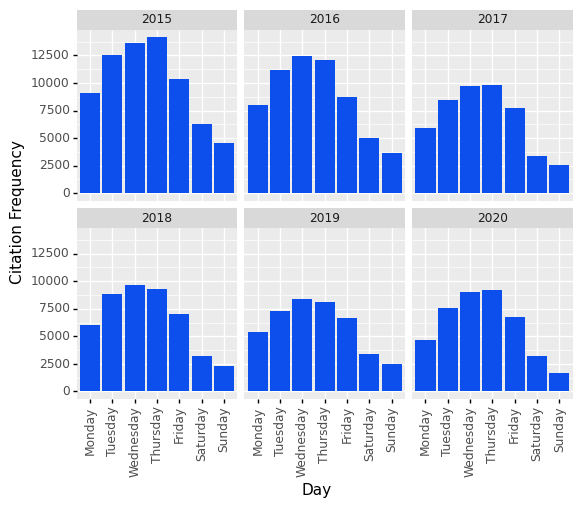

<ggplot: (113263558416)>

In [20]:
day_yr_df = pd.DataFrame(pd.DataFrame(cit.groupby(["Year","day"],dropna=True)["CITATION_NUMBER"].nunique())).reset_index()
day_yr_df['day'] = pd.Categorical(day_yr_df['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"])

(p9.ggplot(data=day_yr_df,
           mapping=p9.aes(x='day',
                          y='CITATION_NUMBER'))
    + p9.geom_bar(stat = "identity", fill = "#0c4fed")+
  p9.theme(axis_text_x = p9.element_text(angle=90))+
 p9.scale_y_continuous(breaks=np.arange(0,15000,2500))
    + p9.facet_wrap("Year")+p9.ylab("Citation Frequency")+
 p9.xlab("Day")
)

### Traffic Charges Description and their Disposition

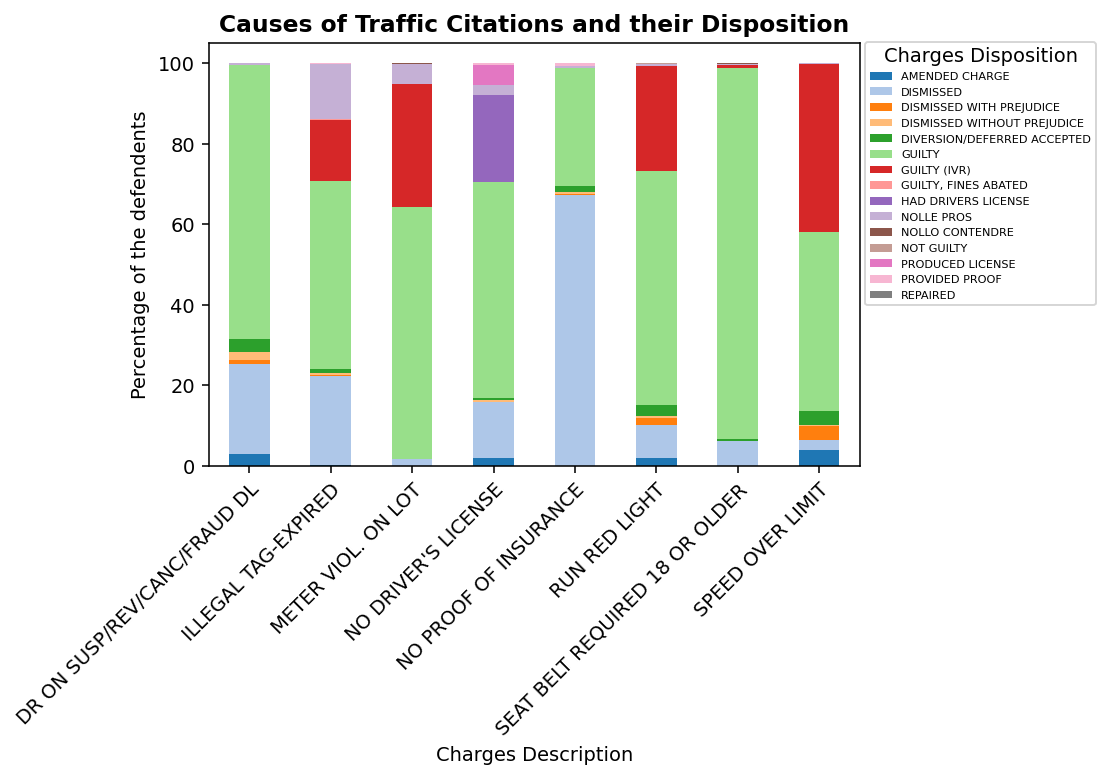

In [21]:
cdr = cit[cit['CHARGE_DESCRIPTION'].isin(["SPEED OVER LIMIT", "NO PROOF OF INSURANCE", "SEAT BELT REQUIRED 18 OR OLDER","METER VIOL. ON LOT","DR ON SUSP/REV/CANC/FRAUD DL","RUN RED LIGHT","ILLEGAL TAG-EXPIRED","NO DRIVER'S LICENSE"])]
cit_charges_results =pd.DataFrame(pd.DataFrame(cdr.groupby(["CHARGE_DESCRIPTION","CHARGE_DISPOSITION"],dropna=True)["CITATION_NUMBER"].nunique()).sort_values("CITATION_NUMBER", ascending=False)).reset_index()
cit_charges_results_pivot = cit_charges_results.pivot_table(index=["CHARGE_DESCRIPTION"],columns="CHARGE_DISPOSITION",
                    values='CITATION_NUMBER')
cit_charges_results_pivot = cit_charges_results_pivot.fillna(0)

plt.rcParams["figure.dpi"] = 140
stacked_data_charges_results = cit_charges_results_pivot.apply(lambda x: x*100/sum(x), axis=1)
stacked_data_charges_results.plot(kind="bar", stacked=True)
plt.title("Causes of Traffic Citations and their Disposition",fontweight="bold")
plt.xlabel("Charges Description")
plt.xticks(rotation=45, ha="right",rotation_mode="anchor")
plt.ylabel("Percentage of the defendents")
fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(title='Charges Disposition', bbox_to_anchor=(1, 1.015), loc='upper left',prop=fontP)
plt.show()

### Top 5 hours of the day for each of the Top 4 locations where maximum number of Citations were Issued

In [22]:
top5_perLoc = pd.DataFrame(pd.DataFrame(cit.groupby(["CITATION_LOCATION"],dropna=True)["CITATION_NUMBER"].nunique()).sort_values("CITATION_NUMBER", ascending=False)).reset_index()
top5_perLoc.head(4)

,CITATION_LOCATION,CITATION_NUMBER
0,455 N MAIN ST,11257
1,E KELLOGG DR,3039
2,E 13TH ST N,2848
3,E HARRY ST,2814


In [75]:
locs = ["455 N MAIN ST","E KELLOGG DR","E 13TH ST N","E HARRY ST"]
top4_locs = []
for n,name in enumerate(locs):
    top54 = pd.DataFrame(pd.DataFrame(cit[cit.CITATION_LOCATION==name].groupby(["CITATION_LOCATION","hour"],dropna=True)["CITATION_NUMBER"].nunique()).sort_values("CITATION_NUMBER", ascending=False)).reset_index().head(5)
    top4_locs.append(top54)
pd.concat(top4_locs)

,CITATION_LOCATION,hour,CITATION_NUMBER
0,455 N MAIN ST,9,5498
1,455 N MAIN ST,14,1751
2,455 N MAIN ST,13,1246
3,455 N MAIN ST,10,1223
4,455 N MAIN ST,8,946
0,E KELLOGG DR,18,380
1,E KELLOGG DR,17,299
2,E KELLOGG DR,22,230
3,E KELLOGG DR,19,225
4,E KELLOGG DR,13,165


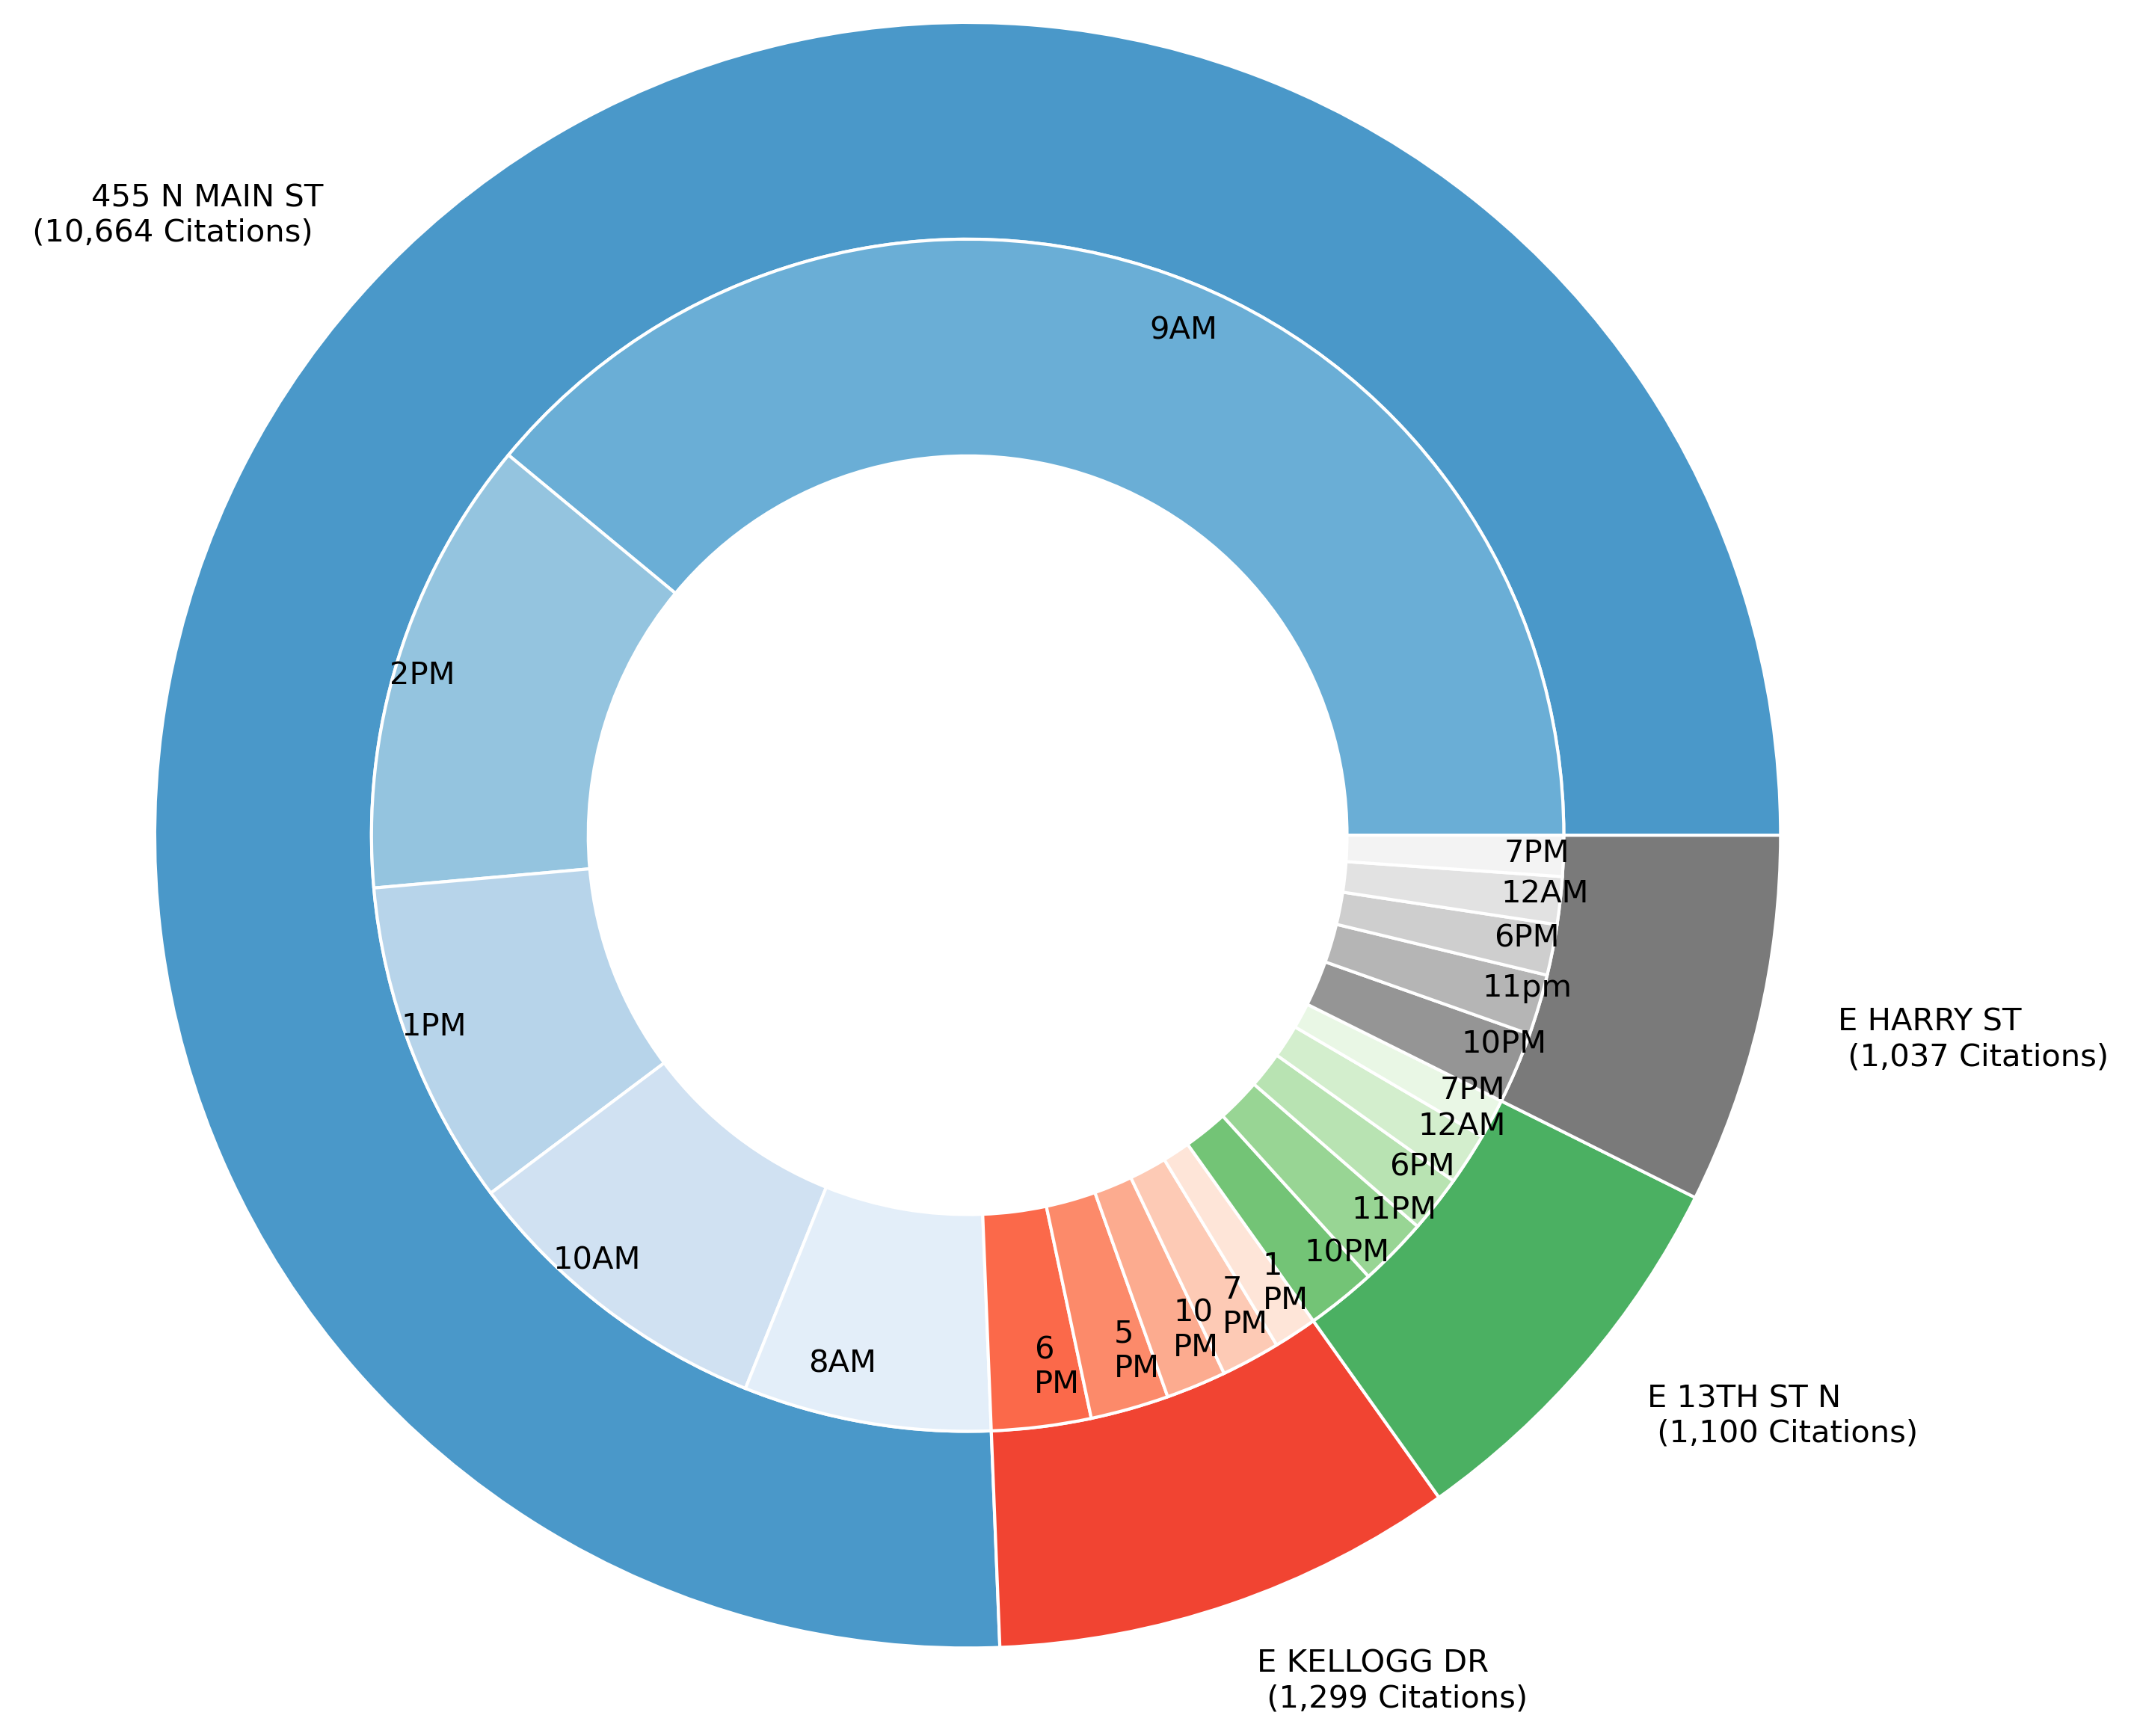

In [74]:
group_names=['455 N MAIN ST\n (10,664 Citations) ', 'E KELLOGG DR\n (1,299 Citations)', 'E 13TH ST N\n (1,100 Citations)', "E HARRY ST\n (1,037 Citations)"]
group_size=[10664,1299,1100,1037]
subgroup_names=['9AM', '2PM', '1PM', '10AM', '8AM', '6\nPM', '5\nPM', '10\nPM', '7\nPM', '1\nPM',"10PM","11PM","6PM","12AM", "7PM","10PM","11pm","6PM", "12AM","7PM"]
subgroup_size=[5498,1751,1246,1223,946,380,299,230,225,165, 267,264,218,199,152,273,232,194,182,156]
 
# Create colors
a, b, c,d =[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens,plt.cm.Greys]

# First Ring (outside)
fig, ax = plt.subplots(dpi=300)
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6),d(0.6)] )
plt.setp( mypie, width=0.8, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=3-0.8, labels=subgroup_names, labeldistance=0.9, colors=[a(0.5), a(0.4), a(0.3), a(0.2), a(0.1),b(0.5), b(0.4), b(0.3), b(0.2), b(0.1),c(0.5), c(0.4), c(0.3), c(0.2), c(0.1),d(0.5),d(0.4), d(0.3), d(0.2), d(0.1)])
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)
plt.savefig("Donut.png",dpi=300, bbox_inches = "tight")
 
# show it
plt.show()

This is a double layeyed donut chart. In this plot, we see the top 5 hours of the day of each of the top 4 locations where maximum number of citations were issued. The outer layer tells the location and the count of citations. The inner layer tells the hour of the day when the citation was issued. 

## Conclusion

- Overall, the number of citations issued in Wichita has decreased significantly, from 70,000 in 2015 to 42,000 in 2020. Although, there is a slight increase in the number of citations issued from 2019 to 2020.
- Chevrolet and Ford drivers received the highest number of citations in Wichita. This is also because these are 2 are the most popular car brands in Wichita. Toyota and Honda fall at 3rd and 4th spot respectively.
- The most committed traffic violation is the "SPEED OVER LIMIT". The 2nd and 3rd most committed violations are "NO PROOF OF INSURANCE" and "DR ON SUSP/REV/CANC/FRAUD DL" (Driving on Suspended/Revoked/Cancelled/Fraud Driver's License). "SPEED OVER LIMIT" violation was committed approximately 3 times more than the "NO PROOF OF INSURANCE" violation.
- Most drivers that received citations belonged to the age group of 20 - 24. Violators who belonged to the age group of 15 and below received the lowest number of citations. A general trend is that people in the high age group received less traffic citations than people in the low age group in any given year. This could be due to the two possible reasons:
    - Growing number of young drivers in the city
    - People in the high age group have more driving experience.
- The general trend for the "SPEED OVER LIMIT" violation is that as we move from low age group to a higher age group, the number of times this violation was issued decreases.
- The maximum number of citations (~7,162) ever issued was in March 2015. We do some seasonality in the plot for Year VS Month.
- In general, the number of citations issued increases in March and August. for the year 2020, we see a sharp decrease in the citations issued from Jan to April. This is very likely due to Covid 19 pandemic as most of the places either closed temporarily or switched to work from home. Another thing worth noting is that number of citations issued decreases in March, and October for any given year.
- Typically, the number of citations issued is high on Wednesdays and Thursdays. The general trend is that the citations issued increases from Monday to Thursday and then decreases all the way till Sunday. For any given year and month, the citations issued is lowest on sundays.
- Talking about the different violations and their disposition, it was found that most of the accused drivers were found guilty for the citations related to wearing seat belts and driving on expired/fraud/canceled licences. Most of the cases were eventually dismissed for the citations related to "NO PROOF OF INSURANCE".
- In the double-layered donut chart, we see the top 5 hours of the day of each of the top 4 locations where the maximum number of citations were issued. It is very prominent that most number of citations were issued on 455 N Main Street at 9 AM. The most intriguing part is that the top 5 times for E 13th Street N and E Harry Street is the same. For E KELLOGG DR, E 13TH ST N, and E HARRY ST, it appears that most of the citations were issued in the evening.

## References

- “ICT_OpenData_Data.” ICT OpenData Portal, *ict-opendata-cityofwichita.hub.arcgis.com/search?q=citations*. Accessed 21 July 2021.
- STAVOLA, MICHAEL. “Crashes Pile up in Wichita Area; More than 100 Calls Because of Slick Road Conditions.” The Wichita Eagle [Wichita, Kansas], 20 Feb. 2020, www.kansas.com/news/local/article240469096.html.
- Leiker, Amy Renee. “Traffic Tickets in Wichita: Crunching the Numbers.” The Wichita Eagle [Wichita, Kansas], 21 Nov. 2015, www.kansas.com/news/local/crime/article45822180.html.
- Leiker, Amy Renee. “See Who Got Traffic and Parking Tickets in Wichita in 2020 & What They Were Cited For.” The Wichita Eagle [Wichita, Kansas], 4 July 2021, www.msn.com/en-us/news/us/see-who-got-traffic-and-parking-tickets-in-wichita-in-2020-what-they-were-cited-for/ar-AALKkMY?ocid=Peregrine.

-- **Deepansh Arora**